In [1]:
KD_path = "ThuanHoa/KhoanhDat/ThuanHoa_TKDD2022.shp"
KetQuaPhanLoaiDat = "KetQuaPhanLoaiDat.tif"

In [2]:
import geopandas as gpd
import rasterio
import os
import rioxarray
import numpy as np
import xarray as xr

In [3]:
## map code
CODE_MAP = {
    "BHK": 2,
    "CLN": 3,
    "DGD": 6,
    "DGT": 6,
    "DNL": 6,
    "DRA": 6,
    "DSH": 6,
    "DTL": 5,
    "DTS": 6,
    "DYT": 6,
    "LUC": 1,
    "NKH": 3,
    "NTD": 6,
    "NTS": 4,
    "ONT": 6,
    "SKC": 6,
    "SKX": 6,
    "SON": 5,
    "TMD": 6,
    "TON": 6,
    "TSC": 6,
}

HT_MAP = {
    "NN": {
        "name": "Đất Nông Nghiệp",
        "data": [1, 2, 3, 4]
    },
    "PNN": {
        "name": "Đất Phi Nông Nghiệp",
        "data": [6]
    },
    "TQ": {
        "name": "Đất Thổ Quả",
        "data": [15]
    }
}

In [14]:
CODE_MAP.get(label[2], 6)

6

In [5]:
gdf = gpd.read_file(KD_path, crs="EPSG:9209")
polygon = gdf.geometry.values
label = gdf.tenchu.values
squares =  gdf.dientich.values

/home/kaito/miniconda3/envs/deafrica-tools-env/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [6]:
gdf

,id,thuaid,xaid,shbando,shthua,dientich,dientichpl,maloaidat,khloaidat,diadanh,dtsd,tenchu,diachi,mdsd2003,kh2003,mscolor,shthuatam,dtthocu,geometry
0,0,7620220493,31576,202,493,5058.2,0.0,50,None,None,1,SKC,TKT,33,SKC,NaN,None,0,"POLYGON ((540179.7 1070550.084, 540209.964 107..."
1,1,7620220456,31576,202,456,407.6,0.0,53,None,None,1,ONT,GDC,26,ONT,NaN,None,0,"POLYGON ((540278.458 1070634.382, 540300.244 1..."
2,2,7620220465,31576,202,465,4537.2,0.0,-1,None,None,1,ONT(1782.60);CLN(2754.70),GDC,-1,None,NaN,None,0,"POLYGON ((540212.264 1070577.653, 540278.458 1..."
3,3,7620220451,31576,202,451,397.9,0.0,53,None,None,1,ONT,GDC,26,ONT,NaN,None,0,"POLYGON ((540315.403 1070666.044, 540325.424 1..."
4,4,7620220494,31576,202,494,3016.7,0.0,6,None,None,1,LUC,GDC,1,LUC,NaN,None,0,"POLYGON ((540301.202 1070519.021, 540315.563 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1127,7620220350,31576,202,350,286.0,0.0,53,None,None,1,ONT,GDC,26,ONT,NaN,None,0,"POLYGON ((547957.384 1070906.509, 547955.744 1..."
1128,1128,7620220273,31576,202,273,11359.0,0.0,13,None,None,1,BHK,GDC,5,BHK,NaN,None,0,"POLYGON ((548008.074 1071098.603, 548032.184 1..."
1129,1129,7620220330,31576,202,330,470.9,0.0,53,None,None,1,ONT,GDC,26,ONT,NaN,None,0,"POLYGON ((548005.824 1070941.303, 547996.343 1..."
1130,1130,7620220559,31576,202,559,341.9,0.0,-1,None,None,1,ONT(297.10);CLN(44.80),GDC,-1,None,NaN,None,0,"POLYGON ((548005.824 1070941.303, 548019.094 1..."


In [102]:
gdf.dientich

0        5058.2
1         407.6
2        4537.2
3         397.9
4        3016.7
         ...   
1127      286.0
1128    11359.0
1129      470.9
1130      341.9
1131     2307.4
Name: dientich, Length: 1132, dtype: float64

In [6]:
label

array(['SKC', 'ONT', 'ONT(1782.60);CLN(2754.70)', ..., 'ONT',
       'ONT(297.10);CLN(44.80)', 'ONT(1485.50);CLN(821.90)'], dtype=object)

<Axes: >

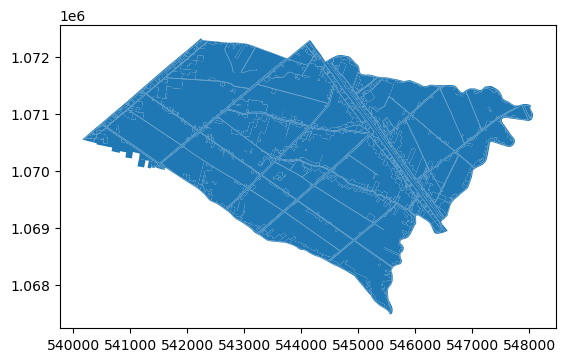

In [6]:
gdf.plot()

In [15]:
print(gdf.geometry[0])

POLYGON ((540179.7 1070550.084, 540209.964 1070575.703, 540210.764 1070577.703, 540212.264 1070577.653, 540297.974 1070574.813, 540315.563 1070574.23, 540301.202 1070519.021, 540179.7 1070550.084))


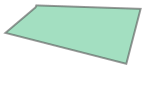

In [16]:
gdf.geometry.iloc[0]

import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
from shapely.ops import unary_union
import rasterio

def sample_points_on_edge(polygon, distance=1.0):
    """Generate points along the edge of the polygon."""
    exterior_coords = list(polygon.exterior.coords)
    points_on_edge = []
    for i in range(len(exterior_coords) - 1):
        start, end = exterior_coords[i], exterior_coords[i + 1]
        line = LineString([start, end])
        # Generate points at intervals along the edge
        distance_along_edge = np.arange(0, line.length, distance)
        for d in distance_along_edge:
            point = line.interpolate(d)
            points_on_edge.append(point)
    return points_on_edge


print(sample_points_on_edge(gdf.geometry[0]))



In [11]:
ouput_image = rioxarray.open_rasterio(KetQuaPhanLoaiDat)

<xarray.DataArray (band: 1, y: 532, x: 830)> Size: 4MB
[441560 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 5.95e+05 5.95e+05 ... 6.033e+05 6.033e+05
  * y            (y) float64 4kB 1.072e+06 1.072e+06 ... 1.067e+06 1.067e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

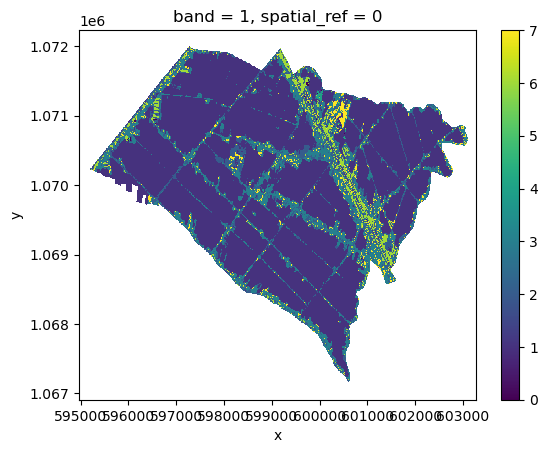

In [12]:
ouput_image.plot()
ouput_image

In [23]:
import importlib
import utils
importlib.reload(utils)
result, sub_result = utils.process(HT_MAP, polygon, label, CODE_MAP, ouput_image, squares)

process NN
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
No data found in bounds.
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
tuple index out of range
No data found in bounds.
tuple index ou

In [ ]:
result

In [ ]:
# show polygon shape
po = polygon[0]
qr = ouput_image.rio.clip([po], "EPSG:9209")
display(po)


In [20]:
from rioxarray.merge import merge_arrays
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
colors = [
    "#abcee9",
    "#ffffc0",
    "#c4ff9e",
    "#ffd6a8",
    "#93ddda",
    "#1aeef7",
    "#ffa7f2",
    "#33ee33"
]
labels = [
    "Lúa tôm",
    "Lúa",
    "CHN",
    "CLN",
    "TS",
    "Sông",
    "Đất xây dựng",
    "Rừng"
]
cmap = ListedColormap(colors)

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


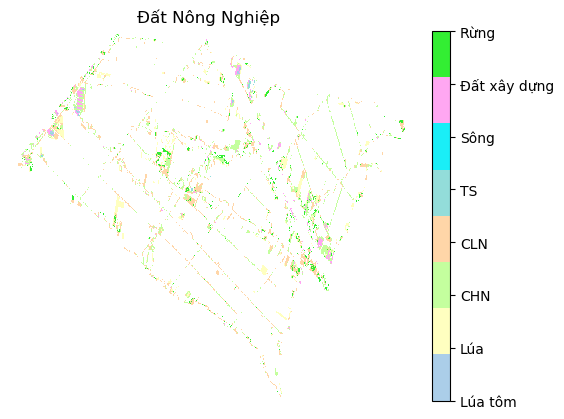

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


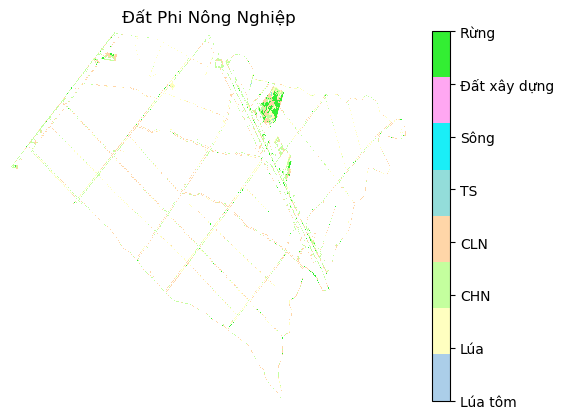

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


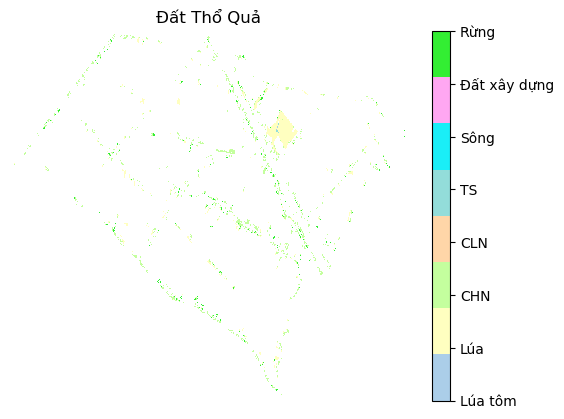

In [26]:
# import importlib
# import utils
# importlib.reload(utils)
save_path = "ThuanHoa/KetQua"
utils.save_file(save_path, result, cmap, labels, HT_MAP )

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


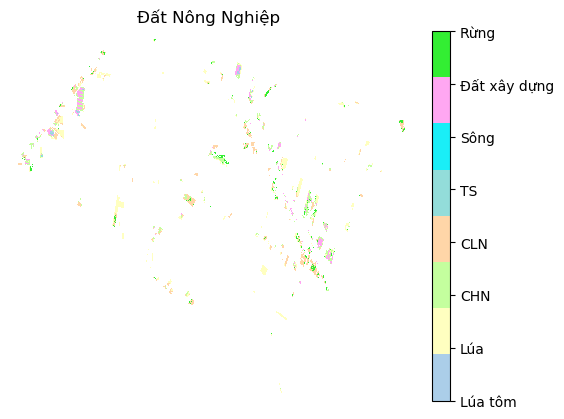

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


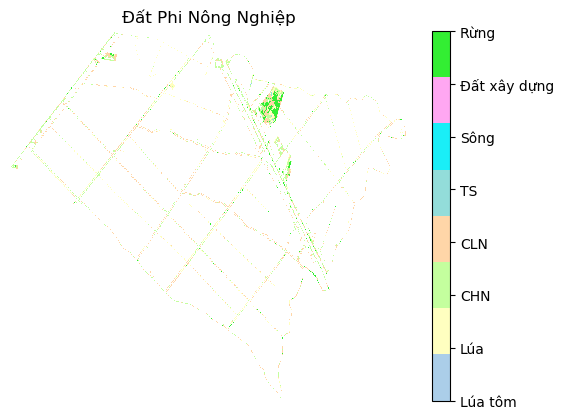

/home/kaito/Desktop/LVTN/KHA/CSIROBoeingPhase4-Vietnam/CSIROBoeingPhase4-Vietnam/utils.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


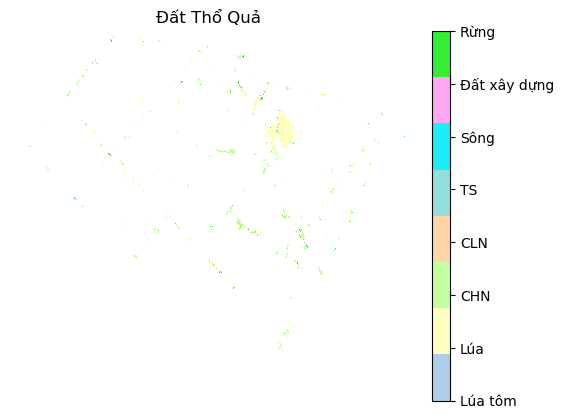

In [27]:
utils.save_file(save_path, sub_result, cmap, labels, HT_MAP, "processed" )

In [9]:
# Add the three datasets into a DataArray wth new dimension by name

import pandas as pd
xx = []

for k, v in result.items():
    rs = merge_arrays(v, nodata = np.nan)
    xx.append(rs.squeeze(drop=True))
xx = xr.concat(xx, pd.Index([HT_MAP[x]['name'] for x in HT_MAP], name='name'))

In [10]:
# Holoviews with "groupby" name dimension - adds a "name" dropdown widget to select between the three datasets

import hvplot.xarray
from holoviews import opts
from datashader import reductions
from bokeh.models.tickers import FixedTicker

colorval = list(range(len(colors)))
options = {
    'cmap': colors,
    'clim': (0, 8),
    'aspect': 'equal',
    'height': 400,
    'colorbar_opts': {
        'major_label_overrides': dict(zip(colorval, labels)),
        'major_label_text_align': 'left',
        'ticker': FixedTicker(ticks=colorval),
    },
}
                                      
xx.hvplot(
    groupby = 'name',
    rasterize = True,                        # Use Datashader, particularly useful for dask arrays
    aggregator = reductions.mode(),          # Datashader selects mode value, requires 'hv.Image'
).options(opts.Image(**options))

:DynamicMap   [name]
   :Image   [y,x]   (value)